In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from mypackage.elastic import Document
from sentence_transformers import SentenceTransformer
from mypackage.sentence import SentenceChain, doc_to_sentences, iterative_merge
from mypackage.clustering import chain_clustering, visualize_clustering, group_chains_by_label

2025-04-05 01:07:23.071016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743804443.084561   20948 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743804443.088405   20948 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
doc = Document.from_json("../cached_docs/doc_0000.json", text_path="article")

In [3]:
sentences = doc_to_sentences(doc, model)
merged = iterative_merge(sentences, threshold=0.6, round_limit=None, pooling_method="average")

In [4]:
labels, clusters = chain_clustering(merged)

/home/zoukos/ceid/final/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


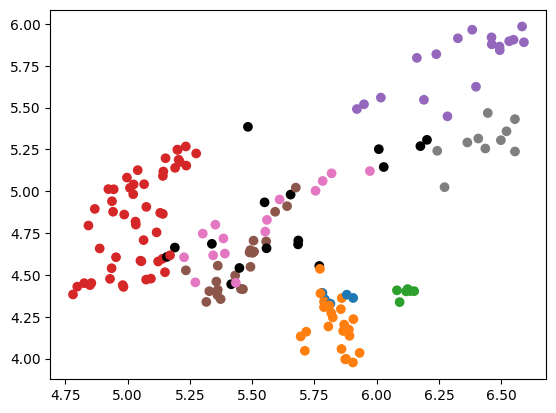

In [5]:
visualize_clustering(merged, labels)

In [6]:
from rich.panel import Panel
from rich.console import Console

console = Console()

for cluster in clusters.items():
    text = "\n\n".join([chain.text for chain in cluster[1]])
    console.print(Panel(text, title = f"Cluster {cluster[0]:02}",border_style="cyan bold"))

╭────────────────────────────────────────────────── Cluster 03 ───────────────────────────────────────────────────╮
│ for about 20 years the problem of properties of short - term changes of solar activity has been considered      │
│ extensively . many investigators studied the short - term periodicities of the various indices of solar         │
│ activity . several periodicities were detected , but the periodicities about 155 days and from the interval of  │
│ @xmath3 $ ] days ( @xmath4 $ ] years ) are mentioned most often . first of them was discovered by @xcite in the │
│ occurence rate of gamma - ray flares detected by the gamma - ray spectrometer aboard the _ solar maximum        │
│ mission ( smm ) . this periodicity was confirmed for other solar flares data and for the same time period       │
│ @xcite . it was also found in proton flares during solar cycles 19 and 20 @xcite , but it was not found in the  │
│ solar flares data during solar cycles 22 @xcite . _    several autors confirmed above results for the daily     │
│ sunspot area data . @xcite studied the sunspot data from 18741984 . she found the 155-day periodicity in data   │
│ records from 31 years .                                                                                         │
│                                                                                                                 │
│ this periodicity is always characteristic for one of the solar hemispheres ( the southern hemisphere for cycles │
│ 1215 and the northern hemisphere for cycles 1621 ) .                                                            │
│                                                                                                                 │
│ moreover , it is only present during epochs of maximum activity ( in episodes of 13 years ) .                   │
│                                                                                                                 │
│ similarinvestigationswerecarriedoutby + @xcite .                                                                │
│                                                                                                                 │
│ the periodicities were searched for the frequency interval 57115 nhz ( 100200 days ) and for each of 10 time    │
│ series . the authors showed that the periodicity between 150160 days is statistically significant during all    │
│ cycles from 16 to 21 .                                                                                          │
│                                                                                                                 │
│ @xcite used the wavelet technique for the daily sunspot areas between 1874 and 1993 .                           │
│                                                                                                                 │
│ they determined the epochs of appearance of this periodicity and concluded that it presents around the maximum  │
│ activity period in cycles 16 to 21 . moreover , the power of this periodicity started growing at cycle 19 ,     │
│ decreased in cycles 20 and 21 and disappered after cycle 21 .                                                   │
│                                                                                                                 │
│ similaranalyseswerepresentedby + @xcite , but for sunspot number , solar wind plasma , interplanetary magnetic  │
│ field and geomagnetic activity index @xmath5 .                                                                  │
│                                                                                                                 │
│ during 1964 - 2000 the sunspot number wavelet power of periods less than one year shows a cyclic evolution with │
│ the phase of the solar cycle.the 154-day period is prominent and its strenth is stronger around the 1982 - 1984 │
│ interval in almost all solar wind parameters . the exi

╭────────────────────────────────────────────────── Cluster -1 ───────────────────────────────────────────────────╮
│ they applied the same power spectrum method as lean , but the daily sunspot area data ( cycles 1221 ) were      │
│ divided into 10 shorter time series .                                                                           │
│                                                                                                                 │
│ for example , if the autocorrelation function is evaluated for @xmath8 , then the distribution points in the    │
│ time domain are : @xmath9 thus , it is obvious that this method should not be used for detecting low frequency  │
│ periodicities with a fairly good resolution .                                                                   │
│                                                                                                                 │
│ the echo - effect occurs when there is a latent harmonic of frequency @xmath10 in the time series , giving a    │
│ spectral peak at @xmath10 , and also periodic terms of frequency @xmath11 etc .                                 │
│                                                                                                                 │
│ series they give similar results .                                                                              │
│                                                                                                                 │
│ the reasons of their existence could be explained by the long - term periodicities and the echo - effect .      │
│                                                                                                                 │
│ below method enables one to detect these effects .                                                              │
│                                                                                                                 │
│ ( solid line ) and the 95% confidence level basing on thered noise ( dotted line ) .                            │
│                                                                                                                 │
│ thus , i use a confidence level basing on the red noise of markov @xcite for the choice of the significant      │
│ peaks of the periodogram computed by the fft method .                                                           │
│                                                                                                                 │
│ thus , the following formula should be satisfied : @xmath68    because the @xmath21-th peak could exist as a    │
│ result of the echo - effect , it is necessary to verify the second condition :    @xmath69\in c_m.\ ] ]    .    │
│                                                                                                                 │
│ this means that the greatest contribution of positive values of the autocorrelation function and positive       │
│ cosines with the period @xmath43 $ ] to the periodogram value @xmath20 is caused by the sum of positive         │
│ products of @xmath74 for each @xmath75-\frac{m}{2k},[\frac{2m}{k}]+\frac{m}{2k})$ ] .    when the implication ( │
│ 8) is false , the peak @xmath20 is mainly created by the sum of positive products of @xmath74 for each          │
│ @xmath76-\frac{m}{2k},\big [ \frac{2m}{n}\big ] + \frac{m}{2k } \big ) $ ] , where @xmath77 is a multiple or a  │
│ divisor of @xmath21 .                                                                                           │
│                                                                                                                 │
│ this time series does not contain a markov - type persistence .                                                 │
│                                                                                                                 │
│ ( the 500-day period ) ]    the comparison of the func

╭────────────────────────────────────────────────── Cluster 04 ───────────────────────────────────────────────────╮
│ the considered peaks were remained unaltered after removing the 11-year cycle and applying the power spectrum   │
│ analysis .                                                                                                      │
│                                                                                                                 │
│ to find periodicities in a given time series the power spectrum analysis is applied . in this paper             │
│                                                                                                                 │
│ two methods are used : the fast fourier transformation algorithm with the hamming window function ( fft ) and   │
│ the blackman - tukey ( bt ) power spectrum method @xcite .                                                      │
│                                                                                                                 │
│ the bt method is used for the diagnosis of the reasons of the existence of peaks , which are obtained by the    │
│ fft method .                                                                                                    │
│                                                                                                                 │
│ the bt method consists in the smoothing of a cosine transform of an autocorrelation function using a 3-point    │
│ weighting average .                                                                                             │
│                                                                                                                 │
│ however , because of an application of the autocorrelation function , the bt method can be used to verify a     │
│ reality of peaks which are computed using a method giving the better resolution ( for example the fft method )  │
│ .                                                                                                               │
│                                                                                                                 │
│ it is valuable to remember that the power spectrum methods should be applied very carefully .                   │
│                                                                                                                 │
│ it is reasonable to use the autocorrelation function and the power spectrum method with a high resolution . in  │
│ the case of a stationary time                                                                                   │
│                                                                                                                 │
│ the method of the diagnosis of an echo - effect in the power spectrum ( de ) consists in an analysis of a       │
│ periodogram of a given time series computed using the bt method .                                               │
│                                                                                                                 │
│ the bt method bases on the cosine transform of the autocorrelation function which creates peaks which are in    │
│ the periodogram , but not in the autocorrelation function .                                                     │
│                                                                                                                 │
│ the de method is used for peaks which are computed by the fft method ( with high resolution ) and are           │
│ statistically significant .                                                                                     │
│                                                                                                                 │
│ the de method analyses raw estimators of the power spectrum .                                                   │
│                                                       

╭────────────────────────────────────────────────── Cluster 05 ───────────────────────────────────────────────────╮
│ such an estimator is consistent and unbiased .                                                                  │
│                                                                                                                 │
│ this may be detected by the autocorrelation function for time series with a large variance .                    │
│                                                                                                                 │
│ however , it is also easy to notice the influence of the long - term periodicities on short - term peaks in the │
│ graphs of the autocorrelation functions .                                                                       │
│                                                                                                                 │
│ moreover , for a stationary time series with the mean zero the fourier transform is equivalent to the cosine    │
│ transform of an autocorrelation function @xcite .                                                               │
│                                                                                                                 │
│ the lower curve illustrates the autocorrelation function of the same time series ( solid line ) . the dotted    │
│ lines represent two standard errors of the autocorrelation function .                                           │
│                                                                                                                 │
│ the autocorrelation values are shown in the right axis . ]     because the statistical tests indicate that the  │
│ time series is a white noise the confidence level is not marked . ]    . ]                                      │
│                                                                                                                 │
│ the first term of the estimator @xmath20 is constant .                                                          │
│                                                                                                                 │
│ let the set of values of the independent variable of the autocorrelation function be called @xmath26 and it can │
│ be divided into the sums of disjoint sets : @xmath27 where + @xmath28 + @xmath29 @xmath30 @xmath31 + @xmath32 + │
│ @xmath33 @xmath34 @xmath35 @xmath36 @xmath37 @xmath38 @xmath39 @xmath40    well , the set @xmath41 contains all │
│ integer values of @xmath23 from the interval of @xmath42 for which the autocorrelation function and the cosinus │
│ function with the period @xmath43 $ ] are positive . the index @xmath44 indicates successive parts of the       │
│ cosinus function for which the cosinuses of successive values of @xmath23 have the same sign .                  │
│                                                                                                                 │
│ the lower curve illustrates the autocorrelation function of the same time series . the autocorrelation values   │
│ are shown in the right axis . ]                                                                                 │
│                                                                                                                 │
│ let us take into consideration all sets \{@xmath52 } , \{@xmath53 } and \{@xmath41 } which are not empty .      │
│ because numberings and power of these sets depend on the form of the autocorrelation function of the given time │
│ series , it is impossible to establish them arbitrary .                                                         │
│                                                                                                                 │
│ thanks to these one can decide which the positive or the negative values of the autocorrelation function have a │
│ larger contribution to the positive values of the esti

╭────────────────────────────────────────────────── Cluster 06 ───────────────────────────────────────────────────╮
│ moreover , the peaks are uncorrelated and their sum is a variance of a considered time series . the main        │
│ disadvantage of this method is a weak resolution of the periodogram points , particularly for low frequences .  │
│                                                                                                                 │
│ the difficulties in the interpretation of significant peaks could be caused by at least four effects : a        │
│ sampling of a continuos function , an echo - effect , a contribution of long - term periodicities and a random  │
│ noise .                                                                                                         │
│                                                                                                                 │
│ first effect exists because periodicities , which are shorter than the sampling interval , may mix with longer  │
│ periodicities . in result , this effect can be reduced by an decrease of the sampling interval between          │
│ observations .                                                                                                  │
│                                                                                                                 │
│ time series often contain long - term periodicities , that influence short - term peaks .                       │
│                                                                                                                 │
│ they could rise periodogram s peaks at lower frequencies .                                                      │
│                                                                                                                 │
│ thus , after a comparison of a periodogram with an appropriate autocorrelation function one can detect peaks    │
│ which are in the graph of the first function and do not exist in the graph of the second function .             │
│                                                                                                                 │
│ when a time series does not contain the markov - type persistence i apply the fisher test and the kolmogorov -  │
│ smirnov test at the significance level @xmath12 @xcite to verify a statistically significance of periodograms   │
│ peaks . the fisher test checks the null hypothesis that the time series is white noise agains the alternative   │
│ hypothesis that the time series contains an added deterministic periodic component of unspecified frequency .   │
│ because the fisher test tends to be severe in rejecting peaks as insignificant the kolmogorov - smirnov test is │
│ also used .                                                                                                     │
│                                                                                                                 │
│ they are caused by the finite length of the given time series and as a result additional peaks of the           │
│ periodogram occur . if @xmath79 is too small , there are less peaks because of a low resolution of the          │
│ periodogram . in applications                                                                                   │
│                                                                                                                 │
│ moreover , the kolmogorov - smirnov test and the fisher test do not reject a null hypothesis that the time      │
│ series is a white noise only .                                                                                  │
│                                                                                                                 │
│ the autocorrelation function of the time series @xmath90 ( the lower curve in figure [ f3 ] ) has only one      │
│ statistically significant peak for @xmath98 months ( 4

╭────────────────────────────────────────────────── Cluster 07 ───────────────────────────────────────────────────╮
│ the periodogram values are presented on the left axis .                                                         │
│                                                                                                                 │
│ the periodogram values are presented on the left axis .                                                         │
│                                                                                                                 │
│ the periodogram values are presented on the left axis .                                                         │
│                                                                                                                 │
│ the periodograms computed by the bt and the fft method are compared .                                           │
│                                                                                                                 │
│ the fft periodogram values are presented on the left axis . the lower curve illustrates the bt periodogram of   │
│ the same time series ( solid line and large black circles ) . the bt periodogram values are shown in the right  │
│ axis . ]                                                                                                        │
│                                                                                                                 │
│ the upper curve in figures [ f2 ] presents the periodogram of the time series @xmath89 .                        │
│                                                                                                                 │
│ for @xmath46 and for periods less than 166 days there is a good comformity of the both periodograms ( but for   │
│ periods greater than 166 days the points of the bt periodogram are not linked because the bt periodogram has    │
│ much worse resolution than the fft periodogram ( no one know how to do it ) ) . for @xmath46 and @xmath113      │
│                                                                                                                 │
│ both indexes are presented on the left axis .                                                                   │
│                                                                                                                 │
│ the described reasoning can be carried out for other values of the periodogram .                                │
│                                                                                                                 │
│ a new method of the detection of statistically significant peaks of the periodograms enables one to identify    │
│ aliases in the periodogram .                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Cluster 02 ───────────────────────────────────────────────────╮
│ the dashed horizontal line shows the zero level .                                                               │
│                                                                                                                 │
│ the dashed horizontal line shows the zero level .                                                               │
│                                                                                                                 │
│ the horizontal line ( dotted line ) shows the zero level .                                                      │
│                                                                                                                 │
│ the dotted and dashed horizontal lines represent levels zero and @xmath136 respectively .                       │
│                                                                                                                 │
│ are showed . in the lower part of figure [ f9 ]                                                                 │
│                                                                                                                 │
│ as it can be seen in the lower part of figure [ f9 ] this is for the case of @xmath157 ( in this figure the     │
│ dashed horizontal line is the level of @xmath158 ) .                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Cluster 00 ───────────────────────────────────────────────────╮
│ they are given as follows    @xmath13    for @xmath14 + where @xmath15 for @xmath16 + @xmath17 is the length of │
│ the time series @xmath18 and @xmath19 is the mean value .                                                       │
│                                                                                                                 │
│ the following time series are used : + @xmath88                                                                 │
│                                                                                                                 │
│ the percentage values show the index @xmath65 for each @xmath41 for the time series @xmath102 ( in parentheses  │
│ for the time series @xmath101 ) . in the right bottom corner the values of @xmath65 for the time series         │
│ @xmath102 , for @xmath109 are written . ]                                                                       │
│                                                                                                                 │
│ two curves @xmath121 and @xmath122 are plotted .                                                                │
│                                                                                                                 │
│ are written : in parentheses the value of @xmath65 for the time series @xmath101 and above it the value of      │
│ @xmath65 for the time series @xmath102 . to make this figure clear the curves are plotted for the set @xmath124 │
│ only . ( in the right bottom corner information about the values of @xmath65 for the time series @xmath102 ,    │
│ for @xmath109 are written . )                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Cluster 01 ───────────────────────────────────────────────────╮
│ the second term takes two values ( depending on odd or even @xmath21 ) which are not significant because        │
│ @xmath22 for large m. thus , the third term of ( 1 ) should be analysed .                                       │
│                                                                                                                 │
│ looking for intervals of @xmath23 for which @xmath24 has the same sign and different signs one can find such    │
│ parts of the function @xmath25 which create the value @xmath20 .                                                │
│                                                                                                                 │
│ however , sometimes the set @xmath41 can be empty . for example , for @xmath45 and @xmath46 the set @xmath47    │
│ should contain all @xmath48 $ ] for which @xmath49 and @xmath50 , but for such values of @xmath23 the values of │
│ @xmath51 are negative . thus , the set @xmath47 is empty .    .                                                 │
│                                                                                                                 │
│ thus , the sets of appropriate indexes of the sets \{@xmath52 } , \{@xmath53 } and \{@xmath41 } are called      │
│ @xmath54 , @xmath55 and @xmath56 respectively . for example the set @xmath56 contains all @xmath44 from the set │
│ @xmath57 for which the sets @xmath41 are not empty .                                                            │
│                                                                                                                 │
│ to separate quantitatively in the estimator @xmath20 the positive contributions which are originated by the     │
│ cases described by the formula ( 5 ) from the cases which are described by the formula ( 3 ) the following      │
│ indexes are introduced : @xmath58 @xmath59 @xmath60 @xmath61 where @xmath62 @xmath63 @xmath64 taking for the    │
│ empty sets \{@xmath53 } and \{@xmath41 } the indices @xmath65 and @xmath66 equal zero . the index @xmath65      │
│ describes a percentage of the contribution of the case when @xmath25 and @xmath51 are positive to the positive  │
│ part of the third term of the sum ( 1 ) . the index @xmath66 describes a similar contribution , but for the     │
│ case when the both @xmath25 and @xmath51 are simultaneously negative .                                          │
│                                                                                                                 │
│ when the difference @xmath67 is positive , the statement the @xmath21-th peak really exists can not be rejected │
│ .                                                                                                               │
│                                                                                                                 │
│ secondly , a percentage of the contribution of the sum of products of positive values of @xmath25 and @xmath51  │
│ to the sum of positive products of the values of @xmath25 and @xmath51 should be evaluated . as a result the    │
│ indexes @xmath65 for each set                                                                                   │
│                                                                                                                 │
│ @xmath41 where @xmath44 is the index from the set @xmath56 are obtained . thirdly , from all sets @xmath41 such │
│ that @xmath70 the set @xmath73 for which the index @xmath65 is the greatest should be chosen .    the           │
│ implication ( 8) is true when the set @xmath73 includes the considered period @xmath43 $ ] .                    │
│                                                                                                                 │
│ it is necessary to remember about the power of the set

In [9]:
print(clusters[3].kth_most_similar_chain().text)

therefore , the fact , that the about @xmath0-day periodicity exists in the time series of sunspot area fluctuations during the maximum activity period is questionable .    . the horizontal line represents the 6-rotation ( 162-day ) period . ]    ]    ]    to verify again the existence of the about @xmath0-day periodicity during the maximum activity period in each solar hemisphere separately , the time series @xmath88 and @xmath89 were also cut down to the maximum activity period ( january 1925december 1930 ) .
